In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

In [2]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

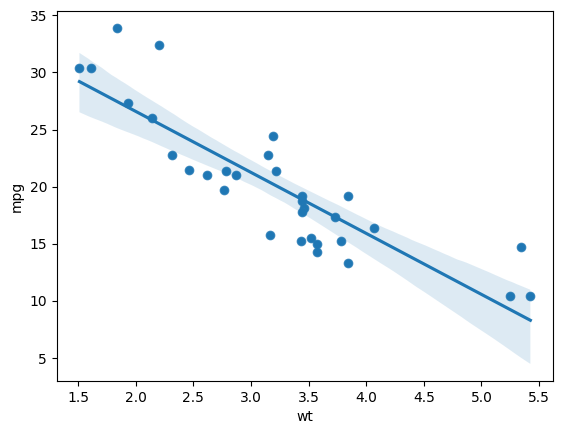

In [3]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [4]:
# convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

#### Model class

In [5]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
            super(LinearRegressionTorch, self).__init__()
            self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        return self.linear(x)

In [6]:
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)

## Loss Function

In [7]:
loss_fun = nn.MSELoss()

#### Optimizer

In [8]:
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

#### Perform Training

In [9]:
losses, slope, bias = [], [], []
NUM_EPOCHS = 2000
for epoch in range(NUM_EPOCHS):
    
    # set gradients to zero
    optimizer.zero_grad()

    # forward pass
    y_pred = model(X)

    # calculate loss
    loss = loss_fun(y_pred, y_true)
    loss.backward()

    # update parameters
    optimizer.step()

    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])


    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")


Epoch 0, Loss: 387.3172302246094
Epoch 100, Loss: 69.7107162475586
Epoch 200, Loss: 41.88261413574219
Epoch 300, Loss: 26.746932983398438
Epoch 400, Loss: 18.514606475830078
Epoch 500, Loss: 14.037060737609863
Epoch 600, Loss: 11.601713180541992
Epoch 700, Loss: 10.277132987976074
Epoch 800, Loss: 9.556683540344238
Epoch 900, Loss: 9.164840698242188
Epoch 1000, Loss: 8.951717376708984
Epoch 1100, Loss: 8.835797309875488
Epoch 1200, Loss: 8.772748947143555
Epoch 1300, Loss: 8.738454818725586
Epoch 1400, Loss: 8.719804763793945
Epoch 1500, Loss: 8.709660530090332
Epoch 1600, Loss: 8.704139709472656
Epoch 1700, Loss: 8.701141357421875
Epoch 1800, Loss: 8.699506759643555
Epoch 1900, Loss: 8.698620796203613


#### visualise model training

<Axes: >

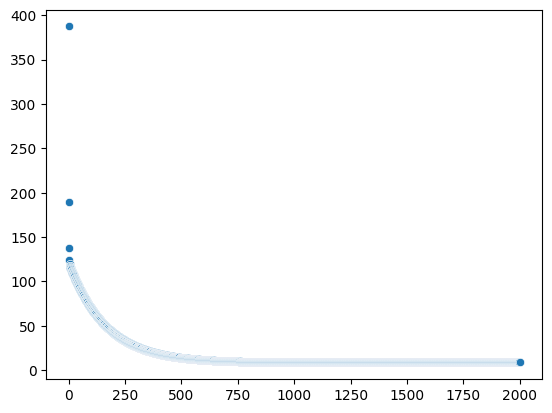

In [10]:
sns.scatterplot(x=range(NUM_EPOCHS), y=losses)

#### Visualise the bias development

<Axes: >

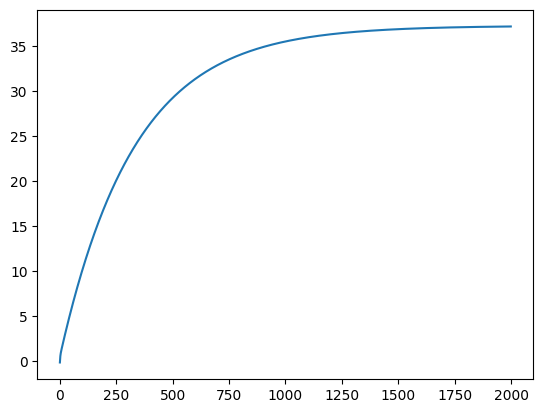

In [11]:
sns.lineplot(x=range(NUM_EPOCHS), y=bias)

#### visualise the slope development

<Axes: >

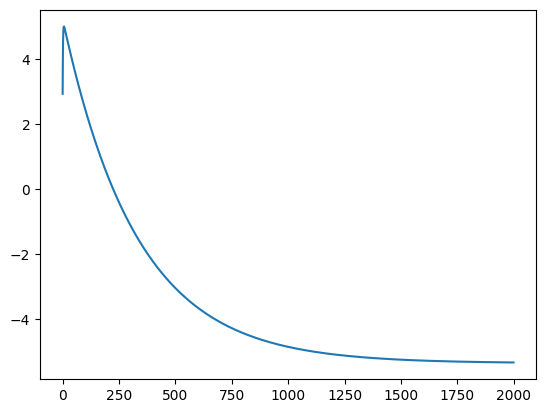

In [12]:
sns.lineplot(x=range(NUM_EPOCHS), y=slope)


#### Check the result

<Axes: >

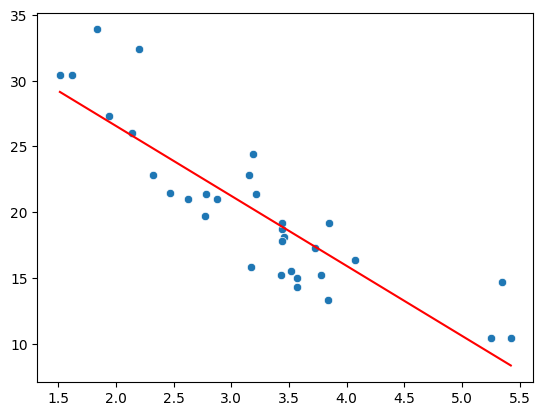

In [13]:
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')